## Loss Visualisation

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel("/home/jupyter/duplicates_detection/intl-duplicates/det_lat/test_folder/summarization_training_logs.xlsx")

In [51]:
df.head()

,loss,learning_rate,epoch,step,eval_loss,eval_rouge1,eval_rouge2,eval_rougeL,eval_bleu,eval_gen_len,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,8.7137,0.000992,0.08,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.0227,0.000984,0.16,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.6907,0.000977,0.24,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.4936,0.000969,0.31,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.2915,0.000961,0.39,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [50]:
df.columns

Index(['loss', 'learning_rate', 'epoch', 'step', 'eval_loss', 'eval_rouge1',
       'eval_rouge2', 'eval_rougeL', 'eval_bleu', 'eval_gen_len',
       'eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second',
       'train_runtime', 'train_samples_per_second', 'train_steps_per_second',
       'total_flos', 'train_loss'],
      dtype='object')

In [58]:
df[df.eval_loss.notnull()]

,loss,learning_rate,epoch,step,eval_loss,eval_rouge1,eval_rouge2,eval_rougeL,eval_bleu,eval_gen_len,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
12,NaN,NaN,1.0,6375,6.576590,0.0000,0.0000,0.0000,0.0596,128.0,1604.2814,0.701,0.351,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,2.0,12750,6.213681,0.0000,0.0000,0.0000,0.0541,128.0,1661.3194,0.677,0.339,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,3.0,19125,5.997968,0.0000,0.0000,0.0000,0.0794,128.0,1667.8991,0.675,0.338,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,4.0,25500,5.874402,0.0009,0.0000,0.0009,0.0648,128.0,1657.9292,0.679,0.340,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,5.0,31875,5.771347,0.0000,0.0000,0.0000,0.0665,128.0,1654.9960,0.680,0.340,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,6.0,38250,5.736332,0.0000,0.0000,0.0000,0.0918,128.0,1663.3600,0.676,0.338,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,7.0,44625,5.705653,0.0009,0.0000,0.0009,0.0434,128.0,1602.9396,0.702,0.351,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,8.0,51000,5.734344,0.0030,0.0000,0.0031,0.0539,128.0,1597.8823,0.704,0.352,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,9.0,57375,5.783319,0.0017,0.0001,0.0016,0.0503,128.0,1594.4050,0.706,0.353,NaN,NaN,NaN,NaN,NaN
136,NaN,NaN,10.0,63750,5.870564,0.0112,0.0000,0.0110,0.0463,128.0,1603.2141,0.702,0.351,NaN,NaN,NaN,NaN,NaN


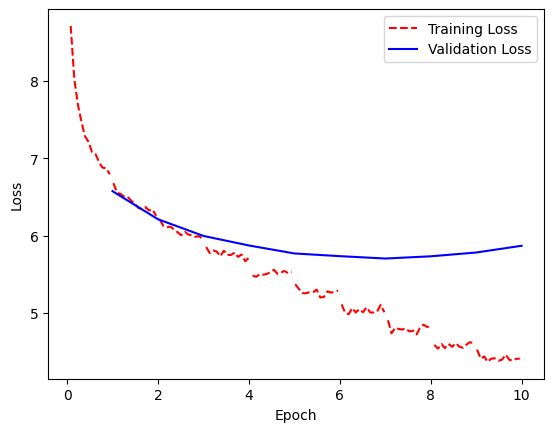

In [60]:
# Visualize loss history
plt.plot(df['epoch'], df['loss'], 'r--')
plt.plot(df[df.eval_loss.notnull()]['epoch'], df[df.eval_loss.notnull()]['eval_loss'], 'b-')
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

## Inference

In [ ]:
from datapull import pull_data
from datasets import DatasetDict
task = "summarization"

In [2]:
english_file_path = None
hindi_file_path = None


In [3]:
dataset = pull_data(english_file_path, hindi_file_path,task)

## Train-Test-Valiation Split 
print("Train-Test-Valiation Split : ")
train_test_dataset = dataset.train_test_split(test_size=0.15)
test_valid = train_test_dataset['test'].train_test_split(test_size=0.5)
raw_datasets = DatasetDict({'train': train_test_dataset['train'],
                            'test': test_valid['test'],
                            'valid': test_valid['train']})


Loading IndicHeadlineGeneration Data : 
Train-Test-Valiation Split : 


In [4]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'input', 'target', 'url'],
        num_rows: 1700
    })
    test: Dataset({
        features: ['id', 'input', 'target', 'url'],
        num_rows: 150
    })
    valid: Dataset({
        features: ['id', 'input', 'target', 'url'],
        num_rows: 150
    })
})

In [5]:
raw_datasets['valid'][0]

{'id': '601',
 'input': 'शिवकार्तिकेयन के अभिनय से सजी आगामी रोमांटिक कॉमेडी फिल्म \'रेमो\' इन दिनों काफी में छाई हुई है।यह फिल्म नवोदित निर्देशक बक्कीराज कन्नन के निर्देशन में बन रही है।चेन्नईः शिवकार्तिकेयन के अभिनय से सजी आगामी रोमांटिक कॉमेडी फिल्म \'रेमो\' इन दिनों काफी में छाई हुई है।यह फिल्म नवोदित निर्देशक बक्कीराज कन्नन के निर्देशन में बन रही है।इस फिल्म में शिवकार्तिकेयन एर नर्स के किरदार में नजर आएंगे।इसे लेकर फिल्म के निर्देशक का कहना है कि उन्हें इस अवतार में कोई नहीं पहचान पाया।कन्नन ने कहा, "एक नर्स की भूमिका के लिए टीम के बाहर से कोई नहीं आया।जब हमने शिव को इस बारे में बताया तो उन्हें विश्वास नहीं हुआ।जब हम विशाखापट्टनम में शूटिंग कर रहे थे, तब यह पूछा गया कि कौन-सी अभिनेत्री इस भूमिका में है और जब हमने बताया कि वह अनुष्का की बहन हैं तो सभी ने मान लिया।" इसे भी पढ़ेः- ओमपुरी ने सेना के जवानों पर दिया बेतुका बयान, भड़के लोग फिल्म के 60 प्रतिशत हिस्से में शिवकार्तिकेयन नर्स की भूमिका में दिखेंगे।कन्नन ने \'मान कराटे\' के अभिनेता की काफी प्रशंसा की।उन्होंने कहा, "कोई भी अभ

In [6]:
input_text = [inp['input'] for inp in  raw_datasets['valid']][:10]
target_text = [tar['target'] for tar in  raw_datasets['valid']][:10]

In [7]:
input_text[2],target_text[2]

("एशिया और अफ्रीका के करीब 20 देशों में परिचालन करने वाली दूरसंचार कंपनी भारती एयरटेल ने आज कहा कि वह कोर्ट ऑफ अपील, लागोस द्वारा 14 फरवरी को जारी फैसले को नाइजीरिया के उच्चतम न्यायालय में चुनौती देगी। कोर्ट ऑफ अपील ने फैसला नाइजीरिया की कंपनी ईकोनेट वायरलेस के हक में फैसला दिया था। ईकोनेट ने दावा किया था कि एयरटेल नेटवक्र्स लिमिटेड में उनकी 5 फीसदी हिस्सेदारी के लिए भारती एयरटेल को उन्हें 300 करोड़ डॉलर देने हैं। ईकोनेट ने यह भी कहा कि 2010 में भारती को अफ्रीकी कारोबार बेचते समय जईन ने वीमोबाइल को भी बेचा था, लेकिन उससे नहीं पूछा, जबकि उसे खरीदने का पहला अधिकार ईकोनेट का ही था। आदेश के अनुसार ईकोनेट के कुछ शेयरों की बिकवाली पर निचली अदालत के फैसले को रद्द करवाने की भारती एयरटेल की दलील कामयाब नहीं रही है। कोर्ट ऑफ अपील ने कहा कि भारती को यह स्वीकार कर लेना चाहिए कि एयरटेल नेटवक्र्स लिमिटेड में ईकोनेट वायरलेस की 5 फीसदी हिस्सेदारी है। मामले पर भारती एयरटेल के प्रवक्ता ने कहा, 'एयरटेल नेटवक्र्स लिमिटेड में 79.06 फीसदी हिस्सेदारी रखने वाली भारती एयरटेल कोर्ट ऑफ अपील, लागोस के 14 फरवरी के

In [30]:
from transformers import AutoModelForSeq2SeqLM
from transformers import Seq2SeqTrainingArguments, DataCollatorForSeq2Seq, AutoTokenizer
model_path = "/home/jupyter/duplicates_detection/intl-duplicates/det_lat/test_folder/summarization-headline-summarize-finetuned-15apr/checkpoint-63750"

# Load the model checkpoint
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)

# Define the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)



In [31]:
# Tokenize the input text
input_tokens = tokenizer.batch_encode_plus(input_text, max_length=512, truncation=True, return_tensors="pt",padding=True)


In [32]:
tokenizer.decode(input_tokens['input_ids'][1])

'2 मार्च 2018 को होली खेली जाएगी।इस साल होली में दिन शनि का दुर्लभ योग बन रहा <unk> संयोग 28 साल बाद बन रहा <unk> इस बार की होली पर शनि धनु राशि में रहेगा<unk> ीं 28 वर्षों के बाद शनि देवगुरु ब<unk> ्पति की राशि में <unk> न राशि धन<unk> नवम चंद्र रहेगा और मित्र शनि का गोचर हो रहा <unk> आय भी बनी रहेगी<unk> ाम समय पर पूरे होंगे और <unk> ोग भी प्राप्त होगा।माह के बीच में कुछ परेशानियां आ <unk> ी हैं, ल<unk> न फिर सब ठीक हो जाएगा<unk> नुमानजी को सिंदूर एवं तेल अर्पण करेंगे तो शुभ होगा।मकर राशि आज का दिन यात्रा में ब<unk> गा<unk> यात्रा में ऑफिस के काम से रिलेटेड हो <unk> ी <unk> ात्रा के <unk> रान किसी दूर के रिश्<unk> ार से आपकी मुलाकात ह</s>'

In [36]:
from transformers import AutoModelForSeq2SeqLM
from transformers import Seq2SeqTrainingArguments, DataCollatorForSeq2Seq, AutoTokenizer

def evaluate_model(model_path, input_text,ground_truth,task):
    print(f"{task.upper() } Evaluation : ")
    
    # Load the model checkpoint
    model = AutoModelForSeq2SeqLM.from_pretrained(model_path)

    # Define the tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_path)

    # Tokenize the input text
    input_tokens = tokenizer.batch_encode_plus(input_text, max_length=512, truncation=True, return_tensors="pt",padding=True)

    # Perform inference
    outputs = model.generate(input_ids=input_tokens["input_ids"], attention_mask=input_tokens["attention_mask"],max_length= 128,early_stopping = True)

    # Decode the generated output tokens
    output_text = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    
    pred_list = []
    for inp,out,gt in zip(input_text,output_text,ground_truth) :
        print('*'*100)
        print()
        print(f"{task.upper() } Model input : {inp} ")
        print(f"{task.upper() } Model output : {out} ")
        print(f"Ground Truth : {gt} ")
        print()
        print('*'*100)
        pred_list.append(out)
        
    return pred_list

In [37]:
model_path

'/home/jupyter/duplicates_detection/intl-duplicates/det_lat/test_folder/summarization-headline-summarize-finetuned-15apr/checkpoint-63750'

In [38]:
generated_text = evaluate_model(model_path,input_text,target_text,task)



SUMMARIZATION Evaluation : 
****************************************************************************************************

SUMMARIZATION Model input : शिवकार्तिकेयन के अभिनय से सजी आगामी रोमांटिक कॉमेडी फिल्म 'रेमो' इन दिनों काफी में छाई हुई है।यह फिल्म नवोदित निर्देशक बक्कीराज कन्नन के निर्देशन में बन रही है।चेन्नईः शिवकार्तिकेयन के अभिनय से सजी आगामी रोमांटिक कॉमेडी फिल्म 'रेमो' इन दिनों काफी में छाई हुई है।यह फिल्म नवोदित निर्देशक बक्कीराज कन्नन के निर्देशन में बन रही है।इस फिल्म में शिवकार्तिकेयन एर नर्स के किरदार में नजर आएंगे।इसे लेकर फिल्म के निर्देशक का कहना है कि उन्हें इस अवतार में कोई नहीं पहचान पाया।कन्नन ने कहा, "एक नर्स की भूमिका के लिए टीम के बाहर से कोई नहीं आया।जब हमने शिव को इस बारे में बताया तो उन्हें विश्वास नहीं हुआ।जब हम विशाखापट्टनम में शूटिंग कर रहे थे, तब यह पूछा गया कि कौन-सी अभिनेत्री इस भूमिका में है और जब हमने बताया कि वह अनुष्का की बहन हैं तो सभी ने मान लिया।" इसे भी पढ़ेः- ओमपुरी ने सेना के जवानों पर दिया बेतुका बयान, भड़के लोग फिल्म के 60 प्रतिशत 

## Evaluation Metrics

In [39]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import SmoothingFunction
from nltk.translate import bleu_score
import nltk
from rouge import Rouge
from pycocoevalcap.cider.cider import Cider
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
def calculate_bleu_scores(actual, generated):
    smoothie = SmoothingFunction().method4
    actual_tokenized = [nltk.word_tokenize(group) for group in actual]
    generated_tokenized = [nltk.word_tokenize(gen) for gen in generated]
    
    score = corpus_bleu(actual_tokenized, generated_tokenized, smoothing_function=smoothie)
    return score

def calculate_rouge_scores(actual, generated):
    rouge = Rouge()
    scores = rouge.get_scores(generated, actual)
    return scores

def calculate_cider_scores(actual, generated):
    act_dict = {idx: [line] for idx, line in enumerate(actual)}
    gen_dict = {idx: [line] for idx, line in enumerate(generated)}
    cider = Cider()
    (score, scores) = cider.compute_score(act_dict, gen_dict)
    return score

In [41]:
calculate_bleu_scores(target_text, generated_text)

0.0008824955654141738

In [42]:
calculate_rouge_scores(target_text, generated_text)

[{'rouge-1': {'r': 0.2, 'p': 0.125, 'f': 0.1538461491124262},
  'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0},
  'rouge-l': {'r': 0.2, 'p': 0.125, 'f': 0.1538461491124262}},
 {'rouge-1': {'r': 0.05555555555555555,
   'p': 0.08333333333333333,
   'f': 0.066666661866667},
  'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0},
  'rouge-l': {'r': 0.05555555555555555,
   'p': 0.08333333333333333,
   'f': 0.066666661866667}},
 {'rouge-1': {'r': 0.2, 'p': 0.1111111111111111, 'f': 0.14285713826530627},
  'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0},
  'rouge-l': {'r': 0.2, 'p': 0.1111111111111111, 'f': 0.14285713826530627}},
 {'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0},
  'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0},
  'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}},
 {'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0},
  'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0},
  'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}},
 {'rouge-1': {'r': 0.09090909090909091,
   'p': 0.09090909090909091,
   'f': 0.09090908590909119},
  'rouge-2': {'r': 0.

In [43]:
calculate_cider_scores(target_text, generated_text)

3.901712782286613e-05